In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# To request JSON data over the internet, we use the Requests Library in Python.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.4 Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    

-81.95637210709646 160.37428017363675
-89.6053936179836 16.179612669256414
-36.70664319715558 94.62740592324138
-84.72212336449921 -29.73563743497664
57.42298684722894 -7.767422498092202
62.828437287248846 -82.93131995071673
-55.91867916990206 -58.45699076179103
60.91373090214719 65.39656570088479
11.81742936033423 -141.4564736248886
-71.66899114448321 172.4151062684246
27.072761750259644 -127.31263695775705
-62.12187443207023 -84.84974112413924
54.160029967872475 86.63916448064049
13.018061772490896 29.22196567253104
64.33184896049201 86.41017908740304
80.60708065909077 13.129634837526794
49.01383805787981 -134.33360397359525
-7.135256002431319 -101.40371203051883
-47.10179259807075 -1.4430277735522736
-26.81563597570701 -124.9472591955992
-17.363237360029927 130.9786898203211
-44.22390923630769 -54.94470643689854
-85.94757503852239 -178.2402000903922
10.740798893472245 -86.03506884739778
62.451136886759656 -155.62569815984904
-38.427143800655266 -27.23286140955088
-5.6707106099870686

86.10277861009939 -129.02225944471783
71.65820816915391 -60.09418515599897
72.35385886907255 -9.384693002047442
-63.49258180030472 116.02270250463886
-65.27567819906967 127.49943099783042
-37.655194253515994 -102.84535784312435
-23.25481804946625 -149.63278287427795
16.98479730886926 -104.01392443643492
-25.920855248416316 55.13748397240434
85.92827314722192 99.22909754356363
59.13884714087493 97.6648926605302
2.645921782947198 -140.13843869417923
9.330867313442823 -173.68120970886991
-48.53326086853394 34.14324069650641
-8.782909910213434 138.54709703146136
41.05224579962214 34.41242373325201
71.7192239722435 155.83797748404186
-56.692440636937334 -37.766619045523385
38.45199836819717 77.67448620652618
-88.50889539459968 6.785935478107831
-11.039966484863513 53.54030966330103
8.736720252547556 -164.20153426487585
55.70195937034069 2.584141280738123
-43.26117948391427 -71.87632985644377
81.0707596352322 -54.89657727582626
7.1460231367340015 -41.385813735660435
88.04412801522273 101.231

In [5]:
# 6.1.5 Generate Random World Cities
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
   

In [7]:
# 6.2.2 Get Started with OpenWeatherMap API
# Make an API Call
# 6.2.6 Import Dependencies, and Initialize an Empty List and Counters
# Loop Through the List of Cities and Build the City URL
# Handle API Request Errors with try-except Blocks
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | portree
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | uray
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | karagaylinskiy
Processing Record 12 of Set 1 | abu zabad
Processing Record 13 of Set 1 | turukhansk
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | prince rupert
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | vaini
Processing R

City not found. Skipping...
Processing Record 37 of Set 4 | pudozh
Processing Record 38 of Set 4 | krasnyy chikoy
Processing Record 39 of Set 4 | vostok
Processing Record 40 of Set 4 | okhotsk
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | khorixas
Processing Record 44 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 46 of Set 4 | padang
Processing Record 47 of Set 4 | aburi
Processing Record 48 of Set 4 | sairang
Processing Record 49 of Set 4 | avera
Processing Record 50 of Set 4 | solnechnyy
Processing Record 1 of Set 5 | chernyshevskiy
Processing Record 2 of Set 5 | meulaboh
Processing Record 3 of Set 5 | marsa matruh
Processing Record 4 of Set 5 | brownsville
Processing Record 5 of Set 5 | markova
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | bundaberg
Processing Record 8 of Set 5 | sorvag
City not found. 

Processing Record 29 of Set 8 | mandalgovi
Processing Record 30 of Set 8 | zaysan
Processing Record 31 of Set 8 | bandarbeyla
Processing Record 32 of Set 8 | jeremie
Processing Record 33 of Set 8 | the valley
Processing Record 34 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 35 of Set 8 | manicore
Processing Record 36 of Set 8 | panaba
Processing Record 37 of Set 8 | bilibino
Processing Record 38 of Set 8 | brus laguna
Processing Record 39 of Set 8 | abu dhabi
Processing Record 40 of Set 8 | puerto asis
Processing Record 41 of Set 8 | ngama
Processing Record 42 of Set 8 | san joaquin
Processing Record 43 of Set 8 | mentok
City not found. Skipping...
Processing Record 44 of Set 8 | westport
Processing Record 45 of Set 8 | valparaiso
Processing Record 46 of Set 8 | balimo
City not found. Skipping...
Processing Record 47 of Set 8 | lubango
Processing Record 48 of Set 8 | north bend
Processing Record 49 of Set 8 | khairagarh
Processing Record 50 of Set 8 | hamilton
P

Processing Record 18 of Set 12 | bima
Processing Record 19 of Set 12 | ijaki
City not found. Skipping...
Processing Record 20 of Set 12 | qeshm
Processing Record 21 of Set 12 | abha
Processing Record 22 of Set 12 | kuryk
Processing Record 23 of Set 12 | rosarito
Processing Record 24 of Set 12 | dongli
Processing Record 25 of Set 12 | istiaia
Processing Record 26 of Set 12 | alofi
Processing Record 27 of Set 12 | guarapari
Processing Record 28 of Set 12 | satitoa
City not found. Skipping...
Processing Record 29 of Set 12 | malwan
City not found. Skipping...
Processing Record 30 of Set 12 | bani walid
Processing Record 31 of Set 12 | bhinga
Processing Record 32 of Set 12 | mizan teferi
Processing Record 33 of Set 12 | tautira
Processing Record 34 of Set 12 | richards bay
Processing Record 35 of Set 12 | semnan
Processing Record 36 of Set 12 | westerland
Processing Record 37 of Set 12 | atar
Processing Record 38 of Set 12 | eureka
Processing Record 39 of Set 12 | nova olimpia
Processing R

In [8]:
print(len(city_data))

562


In [9]:
# 6.2.7 Create a DataFrame of City Weather Data
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,51.80,63,100,20.87,NZ,2022-07-17 18:38:20
1,Bredasdorp,-34.5322,20.0403,54.82,86,0,5.55,ZA,2022-07-17 18:38:28
2,Busselton,-33.6500,115.3333,53.64,92,100,13.47,AU,2022-07-17 18:47:18
3,Ushuaia,-54.8000,-68.3000,42.46,52,40,3.44,AR,2022-07-17 18:47:18
4,Portree,57.4129,-6.1942,61.52,90,100,2.33,GB,2022-07-17 18:47:19
5,Uray,60.1247,64.7758,61.21,57,33,0.63,RU,2022-07-17 18:47:19
6,Hilo,19.7297,-155.0900,89.28,87,100,5.75,US,2022-07-17 18:47:20
7,Lompoc,34.6391,-120.4579,90.79,71,0,8.05,US,2022-07-17 18:38:23
8,Punta Arenas,-53.1500,-70.9167,39.31,70,0,27.63,CL,2022-07-17 18:47:20
9,Karagaylinskiy,54.1720,86.5521,55.35,91,3,2.91,RU,2022-07-17 18:47:21


In [16]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-17 18:38:20,-46.6000,168.3333,51.80,63,100,20.87
1,Bredasdorp,ZA,2022-07-17 18:38:28,-34.5322,20.0403,54.82,86,0,5.55
2,Busselton,AU,2022-07-17 18:47:18,-33.6500,115.3333,53.64,92,100,13.47
3,Ushuaia,AR,2022-07-17 18:47:18,-54.8000,-68.3000,42.46,52,40,3.44
4,Portree,GB,2022-07-17 18:47:19,57.4129,-6.1942,61.52,90,100,2.33


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# 6.3.1 Plot Latitude vs. Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

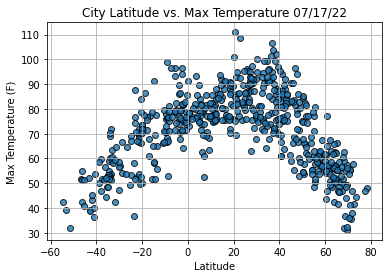

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

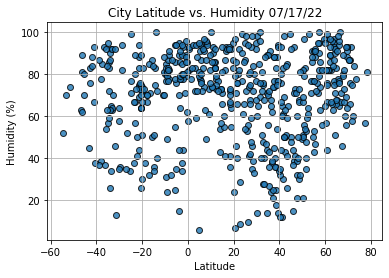

In [23]:
# 6.3.2 Plot Latitude vs. Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

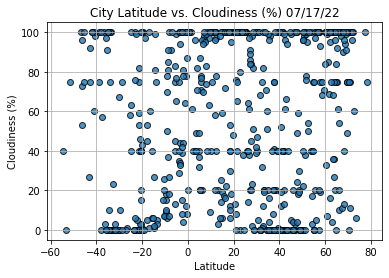

In [24]:
# 6.3.3 Plot Latitude vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

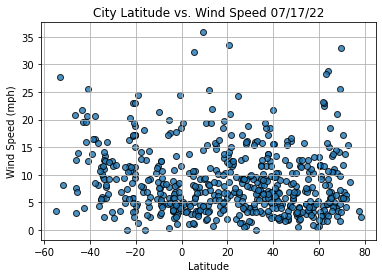

In [25]:
# 6.3.4 Plot Latitude vs. Wind Speed
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# # 6.4.1 Use Linear Regression to Find the Relationship Between Variables
# # 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [81]:
# 6.4.2 Create a Linear Regression Function
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
 # no output until we call the function with five parameters.   
    

In [38]:
#6.4.2 Create the Hemisphere DataFrames

index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2022-07-17 18:45:53
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    78.76
Humidity                       89
Cloudiness                     78
Wind Speed                   5.99
Name: 13, dtype: object

In [40]:
# filter a DataFrame based on a value of a row,
# to get all Northern Hemisphere latitudes, 
# for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
557     True
558     True
559     True
560     True
561    False
Name: Lat, Length: 562, dtype: bool

In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

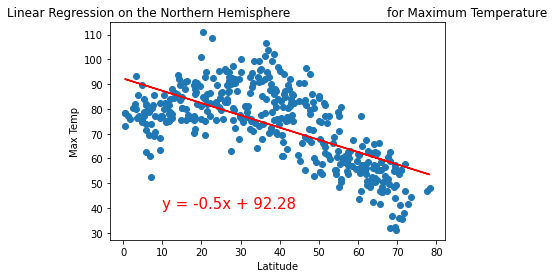

In [77]:
# 6.4.2 Perform Linear Regression on the Maximum Temperature 
# for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))



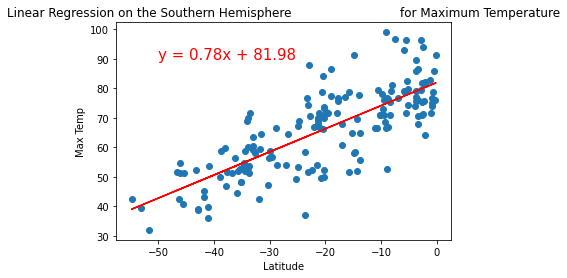

In [67]:
# 6.4.2 Perform Linear Regression on the Maximum Temperature 
# for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                           for Maximum Temperature', 'Max Temp',(-50,90))




Findings:
    The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

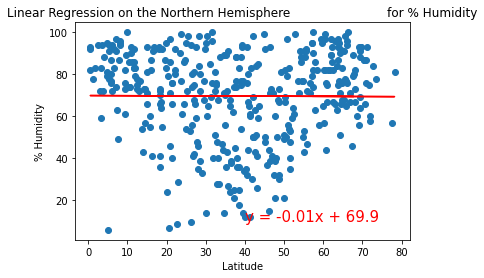

In [51]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity
# Perform Linear Regression on the Percent Humidity 
# for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))



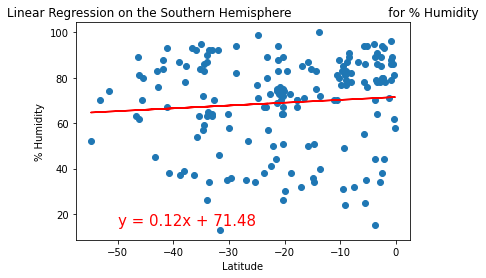

In [53]:
# 6.4.3 Perform Linear Regression on the Percent Humidity 
# for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))



Finding:
    The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

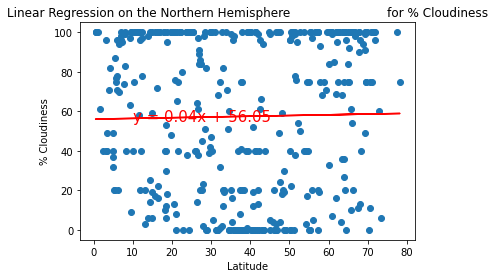

In [78]:
# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness
# skill drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))



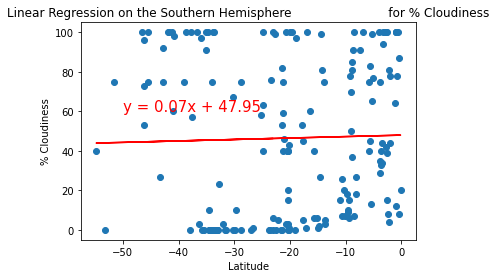

In [79]:
# 6.4.4 Perform Linear Regression on the Percent Cloudiness 
# for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

Finding:
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

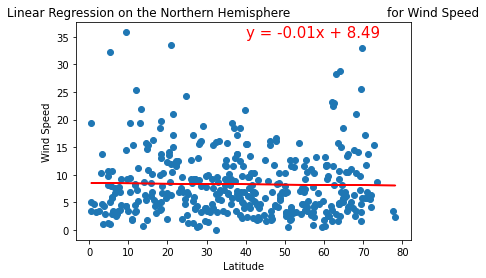

In [80]:
# 6.4.5 Find the Correlation Between Latitude and Wind Speed
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

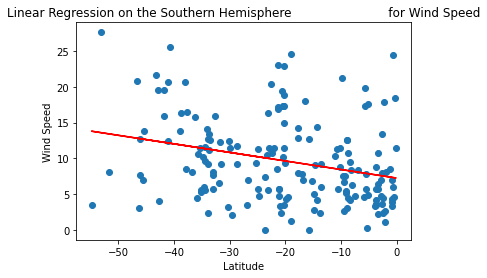

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

Finding:
    The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 